In [1]:
from FIG import FIG
import numpy as np
# Temporary PHATE / graphtools
if not hasattr(np, "float"):
    np.float = float
from PHATET import PHATET

In [2]:
from scipy import io
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load EEG data
data = io.loadmat(r'n10_8-12hz.mat')
eeg = np.transpose(data['data'])

# select all channels
Data_eeg = eeg[:,:]

# load the labels
labels_d = pd.read_excel('labelsn10.xlsx')
labels = np.array(labels_d['Unnamed: 7'])
labels  = np.reshape(labels[:860], 860)

# check the dim of the data
print(Data_eeg.shape)

time_lab = np.arange(860)

(3302400, 18)


In [3]:
from sklearn.cluster import MiniBatchKMeans
import os

In [4]:
GLOBAL_SEED = 172119
np.random.seed(GLOBAL_SEED)

# --------------------------------------------------
# Output directory
# --------------------------------------------------
out_dir = "/Users/chenhaozhe/Desktop/FIG/basis_rbf_MD"
os.makedirs(out_dir, exist_ok=True)

# --------------------------------------------------
# Hyperparameter grids
# --------------------------------------------------
X = Data_eeg
L1 = 3840
L3 = 3840
L2 = 50
Ms = [20, 50, 100]          # number of RBF centers
sigma_scales = [0.25, 0.5, 0.75, 1.0, 1.5, 2.0]


# --------------------------------------------------
# Step 1: get reference sigma (sigma0)
# --------------------------------------------------
fig0 = FIG(
    X,
    window_size=L2,
    n_components=3,
    normalization="sqrt",
    lift_type="rbf",
    num_basis=50,
    #period=10,
    center_window=L1,
    center_stride=L3,
)


fig0.fit()
sigma0 = fig0._rbf_sigma

print(f"Reference sigma0 = {sigma0:.4f}")

# --------------------------------------------------
# Step 2: loop over M, compute centers, tune sigma
# --------------------------------------------------
for M in Ms:
    print(f"\n=== num_basis (M) = {M} ===")

    # --- compute k-means centers once per M ---
    kmeans = MiniBatchKMeans(
        n_clusters=M,
        random_state=GLOBAL_SEED,
        batch_size=1024,
    )
    kmeans.fit(X)
    centers = kmeans.cluster_centers_

    for scale in sigma_scales:
        sigma = scale * sigma0

        print(f"  sigma = {scale} * sigma0 = {sigma:.4f}")

        fig = FIG(
            X,
            window_size=L2,
            n_components=3,
            lift_type="rbf",
            normalization="sqrt",
            num_basis=M,
            center_window=L1,
            center_stride=L3,
            rbf_centers=centers,
            rbf_sigma=sigma,
            random_state=GLOBAL_SEED,
        )

        MD = fig.fit()

        # --------------------------------------------------
        # Save MD
        # --------------------------------------------------
        fname = f"MD_rbf_M{M}_sigma{scale:.2f}sigma0.npy"
        fpath = os.path.join(out_dir, fname)

        np.save(fpath, MD)

        print(f"    saved -> {fpath}")


Reference sigma0 = 12.6603

=== num_basis (M) = 20 ===


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


  sigma = 0.25 * sigma0 = 3.1651
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M20_sigma0.25sigma0.npy
  sigma = 0.5 * sigma0 = 6.3301
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M20_sigma0.50sigma0.npy
  sigma = 0.75 * sigma0 = 9.4952
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M20_sigma0.75sigma0.npy
  sigma = 1.0 * sigma0 = 12.6603
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M20_sigma1.00sigma0.npy
  sigma = 1.5 * sigma0 = 18.9904
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M20_sigma1.50sigma0.npy
  sigma = 2.0 * sigma0 = 25.3206
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M20_sigma2.00sigma0.npy

=== num_basis (M) = 50 ===


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


  sigma = 0.25 * sigma0 = 3.1651
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M50_sigma0.25sigma0.npy
  sigma = 0.5 * sigma0 = 6.3301
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M50_sigma0.50sigma0.npy
  sigma = 0.75 * sigma0 = 9.4952
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M50_sigma0.75sigma0.npy
  sigma = 1.0 * sigma0 = 12.6603
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M50_sigma1.00sigma0.npy
  sigma = 1.5 * sigma0 = 18.9904
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M50_sigma1.50sigma0.npy
  sigma = 2.0 * sigma0 = 25.3206
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M50_sigma2.00sigma0.npy

=== num_basis (M) = 100 ===


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


  sigma = 0.25 * sigma0 = 3.1651
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M100_sigma0.25sigma0.npy
  sigma = 0.5 * sigma0 = 6.3301
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M100_sigma0.50sigma0.npy
  sigma = 0.75 * sigma0 = 9.4952
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M100_sigma0.75sigma0.npy
  sigma = 1.0 * sigma0 = 12.6603
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M100_sigma1.00sigma0.npy
  sigma = 1.5 * sigma0 = 18.9904
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M100_sigma1.50sigma0.npy
  sigma = 2.0 * sigma0 = 25.3206
    saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/MD_rbf_M100_sigma2.00sigma0.npy


In [ ]:
# --------------------------------------------------
# Directory with MD matrices
# --------------------------------------------------
base_dir = "/Users/chenhaozhe/Desktop/FIG/basis_rbf_MD"

# --------------------------------------------------
# Collect all MD files
# --------------------------------------------------
md_files = sorted([
    f for f in os.listdir(base_dir)
    if f.startswith("MD_") and f.endswith(".npy")
])

print(f"Found {len(md_files)} MD files")

# --------------------------------------------------
# Loop over all MD matrices
# --------------------------------------------------
for fname in md_files:
    print(f"\nProcessing {fname}")

    path = os.path.join(base_dir, fname)
    MD = np.load(path)

    # --------------------------------------------------
    # PHATE → 10D (precomputed distance)
    # --------------------------------------------------
    phate_10d = PHATET(
        knn_dist="precomputed_distance",
        k=20,
        n_components=10,
        verbose=0,
    )

    Z_10d = phate_10d.fit_transform(MD)

    # --------------------------------------------------
    # PHATE → 2D (on 10D embedding)
    # --------------------------------------------------
    phate_2d = PHATET(
        n_components=2,
        k=20,
        verbose=0,
    )

    fig_2d = phate_2d.fit_transform(Z_10d)

    # --------------------------------------------------
    # Save ONLY 2D result
    # --------------------------------------------------
    base = fname.replace(".npy", "")
    out_path = os.path.join(base_dir, f"fig_2d_{base}.npy")

    np.save(out_path, fig_2d)

    print(f"  saved -> {out_path}")
    

Found 18 MD files

Processing MD_rbf_M100_sigma0.25sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 467 with stress 0.5806545311845116


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 52 with stress 19515.02874848992
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M100_sigma0.25sigma0.npy

Processing MD_rbf_M100_sigma0.50sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 570 with stress 0.3590422950094988


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 17 with stress 23074.33972233463
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M100_sigma0.50sigma0.npy

Processing MD_rbf_M100_sigma0.75sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 512 with stress 1.1133489104214118


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 111 with stress 20210.733733604222
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M100_sigma0.75sigma0.npy

Processing MD_rbf_M100_sigma1.00sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 464 with stress 5.200150854514817


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 64 with stress 19023.996430940002
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M100_sigma1.00sigma0.npy

Processing MD_rbf_M100_sigma1.50sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 1686 with stress 3.16238557124335


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 925 with stress 17523.717318011357
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M100_sigma1.50sigma0.npy

Processing MD_rbf_M100_sigma2.00sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 1613 with stress 2.6580649411741315


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 89 with stress 19680.07923354652
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M100_sigma2.00sigma0.npy

Processing MD_rbf_M20_sigma0.25sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 1368 with stress 3.2021181165020782


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 31 with stress 21036.731814896648
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M20_sigma0.25sigma0.npy

Processing MD_rbf_M20_sigma0.50sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 695 with stress 2.467374113516599


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 151 with stress 19041.815495507213
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M20_sigma0.50sigma0.npy

Processing MD_rbf_M20_sigma0.75sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 646 with stress 7.096754380780769


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 86 with stress 17963.637137002854
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M20_sigma0.75sigma0.npy

Processing MD_rbf_M20_sigma1.00sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 1766 with stress 3.044284104922714


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 167 with stress 15542.760425165043
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M20_sigma1.00sigma0.npy

Processing MD_rbf_M20_sigma1.50sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 1865 with stress 6.5506473826437865


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 126 with stress 14092.661335810448
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M20_sigma1.50sigma0.npy

Processing MD_rbf_M20_sigma2.00sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 1523 with stress 2.9346494481393948


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 46 with stress 17113.363029125918
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M20_sigma2.00sigma0.npy

Processing MD_rbf_M50_sigma0.25sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 537 with stress 0.37814999886385314


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 58 with stress 18639.62418812179
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M50_sigma0.25sigma0.npy

Processing MD_rbf_M50_sigma0.50sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 427 with stress 0.3967232540072906


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 39 with stress 20098.25702992589
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M50_sigma0.50sigma0.npy

Processing MD_rbf_M50_sigma0.75sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 457 with stress 2.025663666663115


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 74 with stress 19076.97088643158
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M50_sigma0.75sigma0.npy

Processing MD_rbf_M50_sigma1.00sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 493 with stress 3.2942438507066907


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 130 with stress 20082.163920249062
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M50_sigma1.00sigma0.npy

Processing MD_rbf_M50_sigma1.50sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 1749 with stress 3.320454944605162


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 53 with stress 14973.193912494437
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M50_sigma1.50sigma0.npy

Processing MD_rbf_M50_sigma2.00sigma0.npy


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)
/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 1728 with stress 2.814456741610176


/Users/chenhaozhe/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


breaking at iteration 114 with stress 20689.126320321997
  saved -> /Users/chenhaozhe/Desktop/FIG/basis_rbf_MD/fig_2d_MD_rbf_M50_sigma2.00sigma0.npy


In [6]:
# Make a copy so we don't destroy the original labels
labels_merged = labels.copy()

# Merge sleep stages
labels_merged[np.isin(labels_merged, [1, 2])] = 2   # S1-S2
labels_merged[np.isin(labels_merged, [3, 4])] = 4   # S3-S4

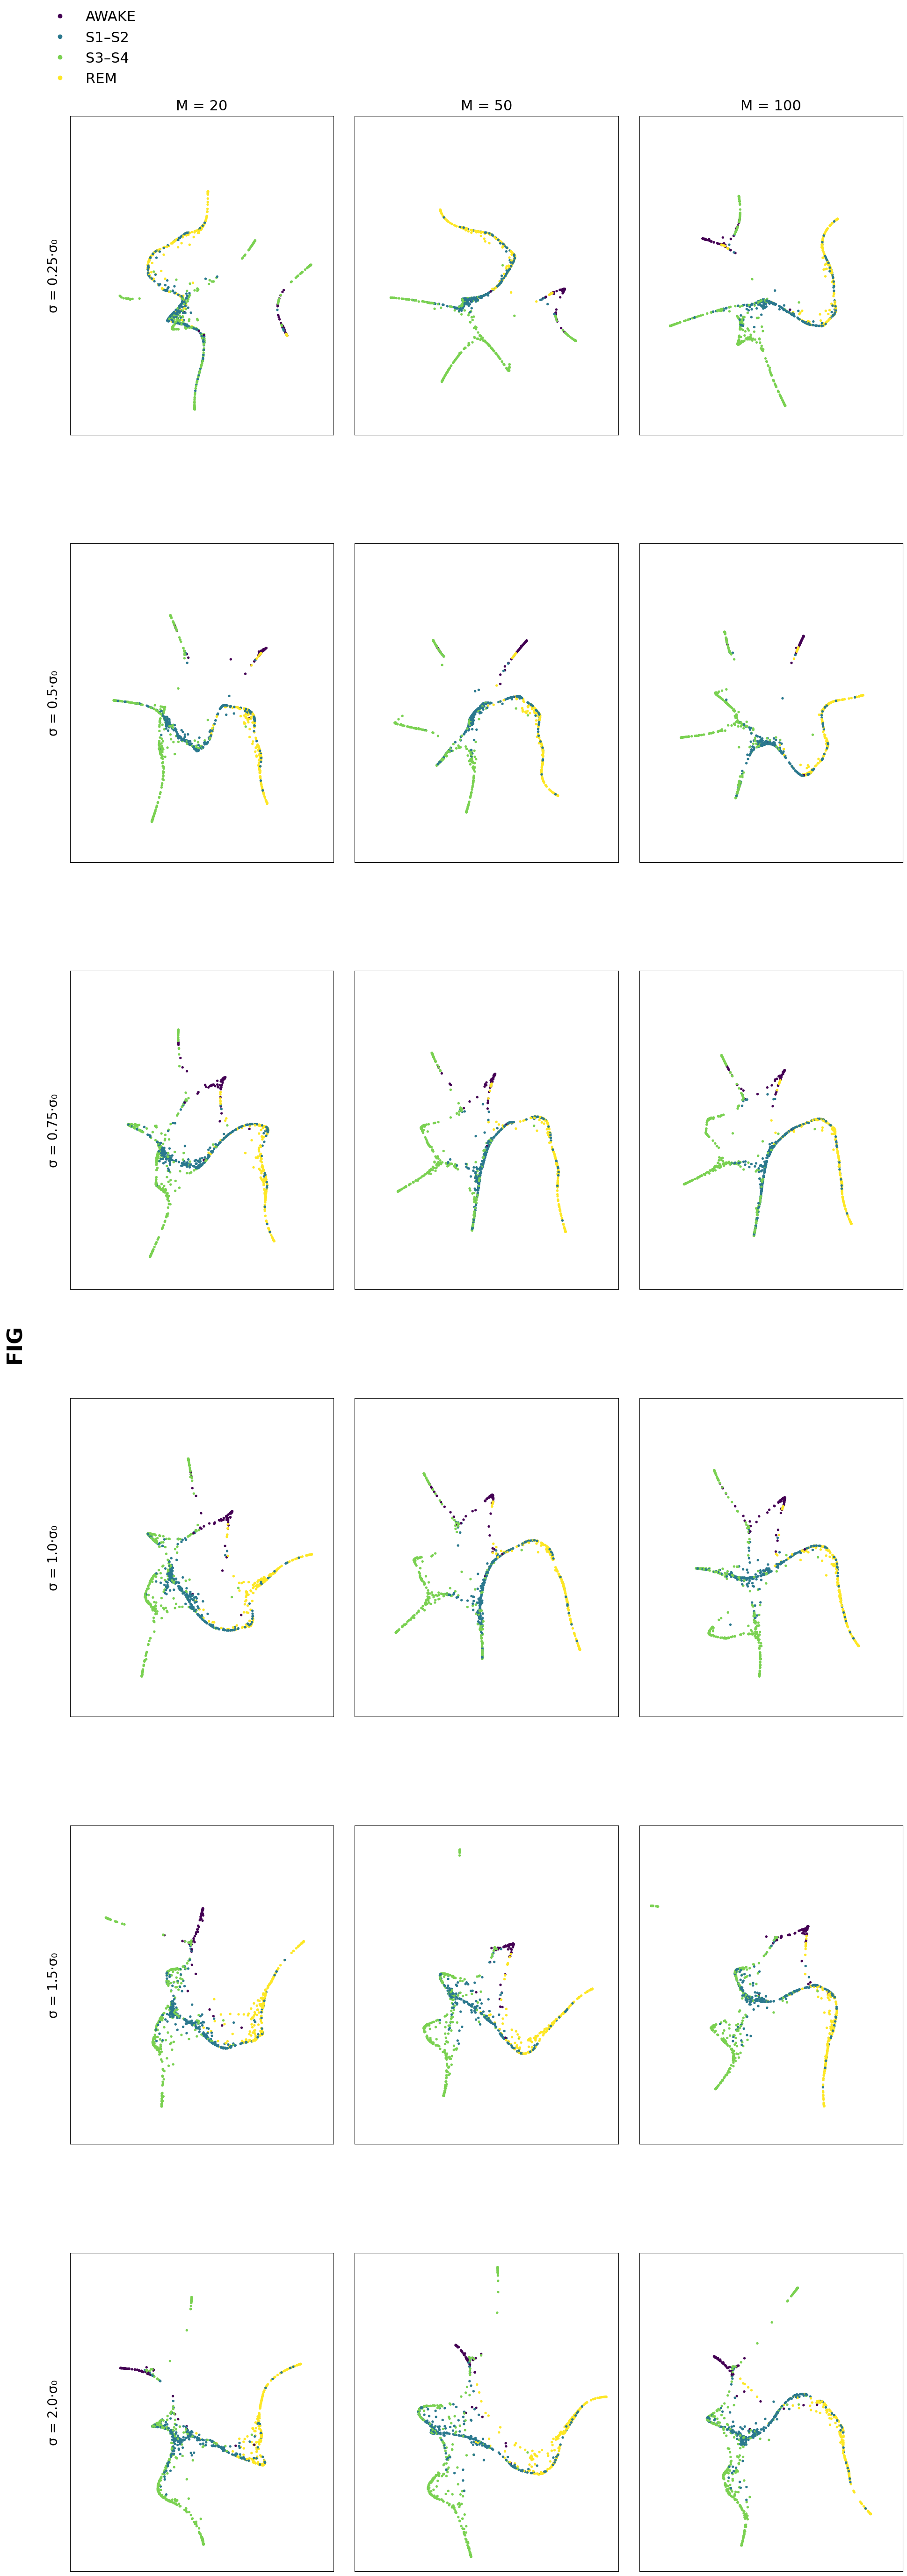

In [28]:
from matplotlib import pyplot as plt
import numpy as np
import os

# --------------------------------------------------
# Directory
# --------------------------------------------------
base_dir = "/Users/chenhaozhe/Desktop/FIG/basis_rbf_MD"

# --------------------------------------------------
# Grid definition
# --------------------------------------------------
Ms = [20, 50, 100]
sigma_scales = [0.25, 0.5, 0.75, 1.0, 1.5, 2.0]

# --------------------------------------------------
# Legend dictionary (your exact mapping)
# --------------------------------------------------
legend_dict = {
    0: "AWAKE",
    2: "S1–S2",
    4: "S3–S4",
    5: "REM",
}

# --------------------------------------------------
# Dummy scatter (for legend only)
# --------------------------------------------------
# pick one embedding just to generate handles
dummy_path = os.path.join(
    base_dir, f"fig_2d_MD_rbf_M{Ms[0]}_sigma{sigma_scales[0]:.2f}sigma0.npy"
)
dummy_fig = np.load(dummy_path)

scatterplot = plt.scatter(
    dummy_fig[:, 0],
    dummy_fig[:, 1],
    c=labels_merged,
    s=8,
)
plt.close()

# --------------------------------------------------
# Create figure (WIDE, like your example)
# --------------------------------------------------
fig, axes = plt.subplots(
    nrows=len(sigma_scales),
    ncols=len(Ms),
    figsize=(20, 60),   # 👈 wide & tall
    sharex=True,
    sharey=True,
)

# --------------------------------------------------
# Plot loop
# --------------------------------------------------
for i, sigma in enumerate(sigma_scales):
    for j, M in enumerate(Ms):
        ax = axes[i, j]

        fname = f"fig_2d_MD_rbf_M{M}_sigma{sigma:.2f}sigma0.npy"
        Z = np.load(os.path.join(base_dir, fname))

        ax.scatter(
            Z[:, 0],
            Z[:, 1],
            c=labels_merged,
            s=8,
        )

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect("equal", adjustable="box")

        # Column titles (top row only)
        if i == 0:
            ax.set_title(f"M = {M}", fontsize=22, pad=10)

        # Row labels (left column only)
        if j == 0:
            ax.set_ylabel(
                f"σ = {sigma}·σ₀",
                fontsize=20,
                rotation=90,
                labelpad=15,
            )

# --------------------------------------------------
# Global FIG label on the left (like your example)
# --------------------------------------------------
fig.text(
    0.03,      # was ~0.04–0.06, move IN
    0.5,
    "FIG",
    va="center",
    rotation="vertical",
    fontsize=32,
    fontweight="bold",
)

# --------------------------------------------------
# Global legend (top-left, manual)
# --------------------------------------------------
legend_labels = [legend_dict[label] for label in np.unique(labels_merged)]

fig.legend(
    handles=scatterplot.legend_elements()[0],
    labels=legend_labels,
    loc="upper left",
    bbox_to_anchor=(0.06, 0.98),
    fontsize=22,
    frameon=False,
)

# --------------------------------------------------
# Layout tuning (important)
# --------------------------------------------------
plt.subplots_adjust(
    left=0.1,
    right=0.99,
    top=0.95,
    bottom=0.05,
    wspace=0.08,
    hspace=0.1,
)

plt.show()
